In [1]:
# Imported appropriate libraries for assignment

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

Data Cleansing

In [2]:
# Data was reletively clean to begin with, no modificiations needed.

rock_music_df = pd.read_csv('history-of-rock-spotify - Copy.csv')
rock_music_df.reset_index()

,level_0,index,name,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
5481,5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734
5482,5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853


In [3]:
# Function to create a category for each decade, to then add said function into the dataset as a column.

def get_decade(year):
    if year < 1960:
        return "1950s"
    elif year < 1970:
        return "1960s"
    elif year < 1980:
        return "1970s"
    elif year < 1990:
        return "1980s"
    elif year < 2000:
        return "1990s"
    elif year < 2010:
        return "2000s"
    elif year < 2020:
        return "2010s"
    else:
        return "2020s"
    
rock_music_df['decade'] = rock_music_df['release_date'].apply(get_decade)
rock_music_df.reset_index()

,level_0,index,name,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,decade
0,0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1990s
1,1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1970s
2,2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1970s
3,3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1970s
4,4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1960s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,2010s
5480,5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,2010s
5481,5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,2010s
5482,5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853,1970s


In [5]:
rock_music_df.to_csv('rock_music_df.csv')

Release Date

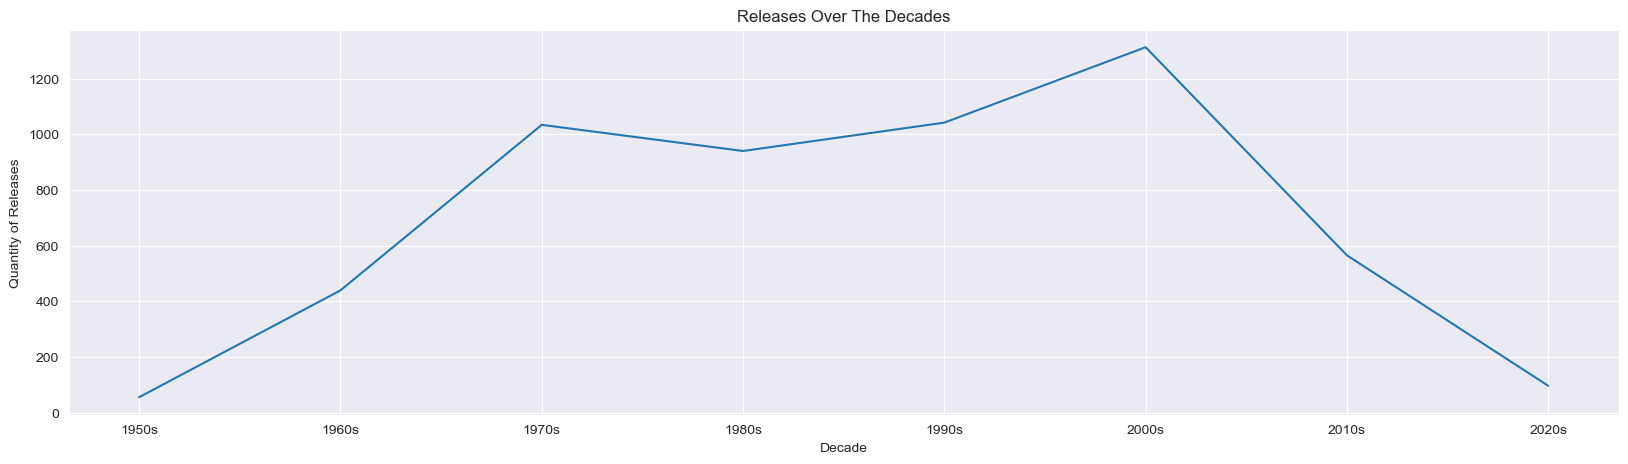

In [4]:
#Line graph to showcase the quanitity of releases in a visually clear, distinct manner.

rock_releases = rock_music_df.groupby('decade').index.count()
rock_releases.plot(kind='line', title='Releases Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Quantity of Releases')
plt.show()

Danceability

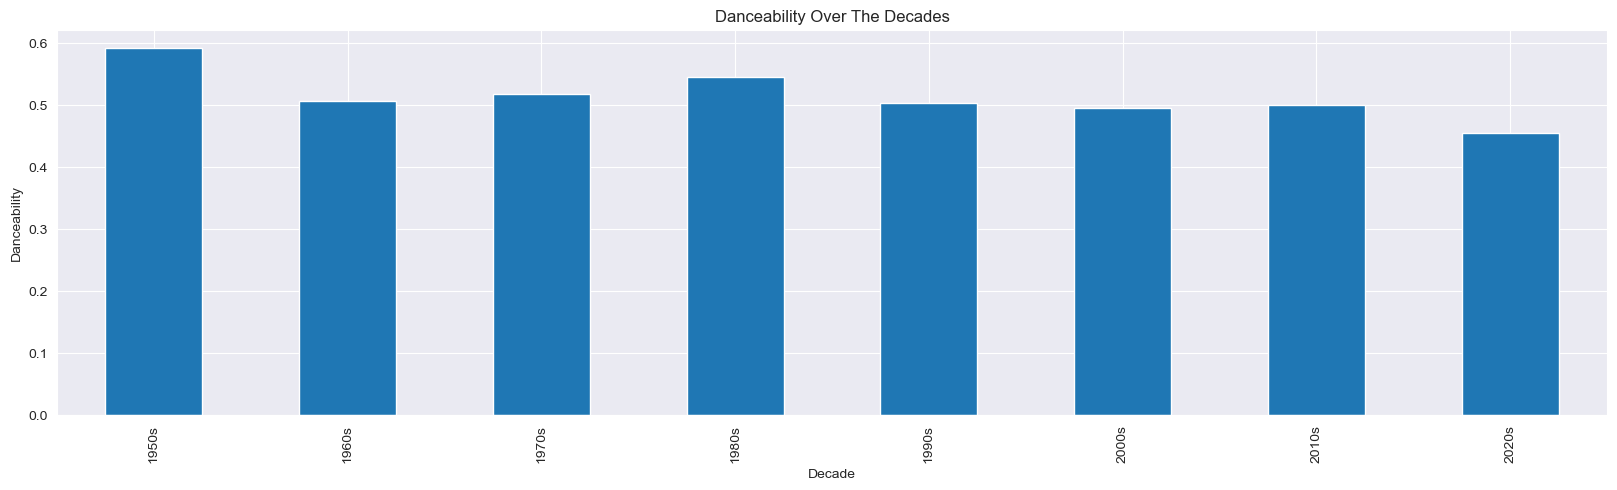

In [13]:
#Bar graph chosen to show how "danceability" went through some experiementation and then standardized later on.

rock_danceability = rock_music_df.groupby('decade')['danceability'].mean()
rock_danceability.plot(kind='bar', title='Danceability Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Danceability')
plt.show()

Loudness

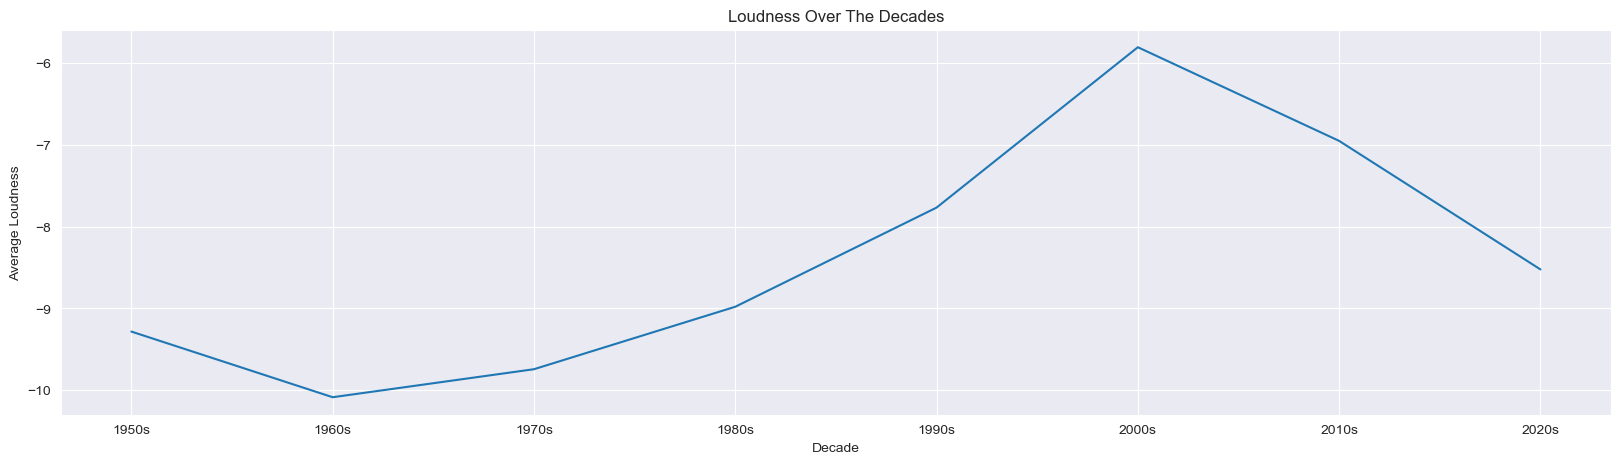

In [8]:
#Line graph also used here to showcase the "Loudness Wars" over the decades, where rock music would be mastered 'louder' to catch the audience's attention better.

rock_loudness = rock_music_df.groupby('decade')['loudness'].mean()
rock_loudness.plot(kind='line', title='Loudness Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Average Loudness')
plt.show()

Popularity

In [5]:
#No visuals made for this category as this is mostly to showcase what the top most popular songs are from the Spotify dataset, and their statistical data more easily through .reset_index()

rock_music_df[rock_music_df['popularity'] >= 83].sort_values(by = ['popularity'], ascending=False).head(10).reset_index()

,level_0,index,name,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,decade
0,16,16,Back In Black,AC/DC,1980,4.258217,84,0.310,0.01100,0.700,0.009650,9,0.0828,-5.678,0.0470,188.386,4,0.763,1980s
1,85,85,In the End,Linkin Park,2000,3.614667,84,0.556,0.00958,0.864,0.000000,3,0.2090,-5.870,0.0584,105.143,4,0.400,2000s
2,96,96,Highway to Hell,AC/DC,1979,3.473333,84,0.574,0.06100,0.913,0.001580,6,0.1560,-4.793,0.1330,115.728,4,0.423,1970s
3,116,116,Yellow,Coldplay,2000,4.446217,84,0.429,0.00239,0.661,0.000121,11,0.2340,-7.227,0.0281,173.372,4,0.285,2000s
4,1116,1116,The Scientist,Coldplay,2002,5.160000,84,0.557,0.73100,0.442,0.000015,5,0.1100,-7.224,0.0243,146.277,4,0.213,2000s
5,2153,2153,Pumped Up Kicks,Foster The People,2011,3.993333,84,0.733,0.14500,0.710,0.115000,5,0.0956,-5.849,0.0292,127.975,4,0.965,2010s
6,2619,2619,Jingle Bell Rock,Bobby Helms,1992,2.182883,84,0.754,0.64300,0.424,0.000000,2,0.0652,-8.463,0.0363,119.705,4,0.806,1990s
7,5,5,Hotel California - 2013 Remaster,Eagles,1976,6.522933,83,0.579,0.00574,0.508,0.000494,2,0.0575,-9.484,0.0270,147.125,4,0.609,1970s
8,358,358,Billie Jean,Michael Jackson,1982,4.897100,83,0.920,0.02360,0.654,0.015800,11,0.0359,-3.051,0.0401,117.046,4,0.847,1980s
9,502,502,Take on Me,a-ha,1985,3.754667,83,0.573,0.01800,0.902,0.001250,6,0.0928,-7.638,0.0540,84.412,4,0.876,1980s


Length

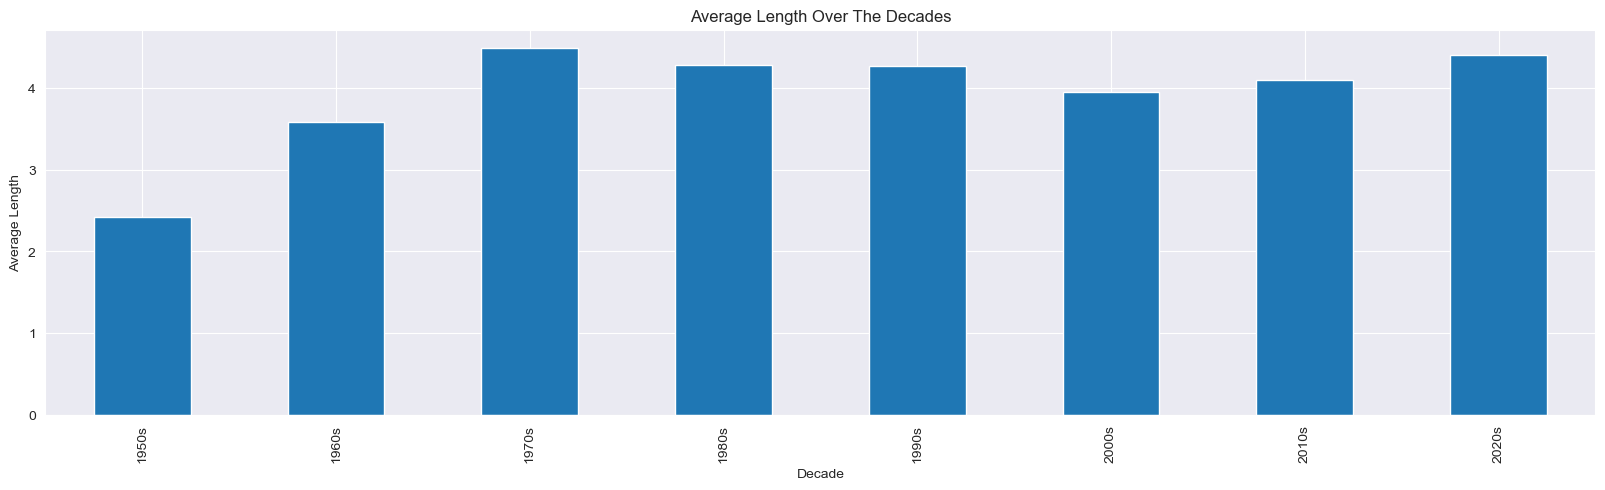

In [11]:
#Bar graph showcasing how at one point length varried, but became longer overtime and eventually standardized to about 4 minutes length.

rock_length = rock_music_df.groupby('decade')['length'].mean()
rock_length.plot(kind='bar', title='Average Length Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Average Length')
plt.show()

Energy

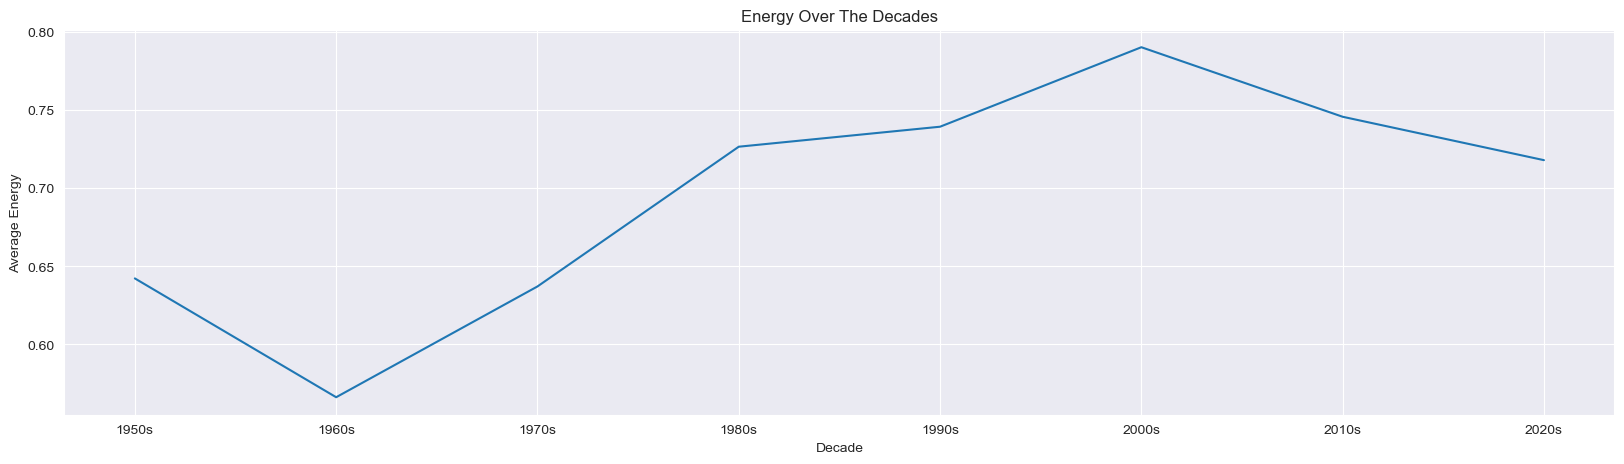

In [12]:
#Line graph to showcase how 'energy' increased over time from the earlier decades of rock music.

rock_energy = rock_music_df.groupby('decade')['energy'].mean()
rock_energy.plot(kind='line', title='Energy Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Average Energy')
plt.show()

Liveness

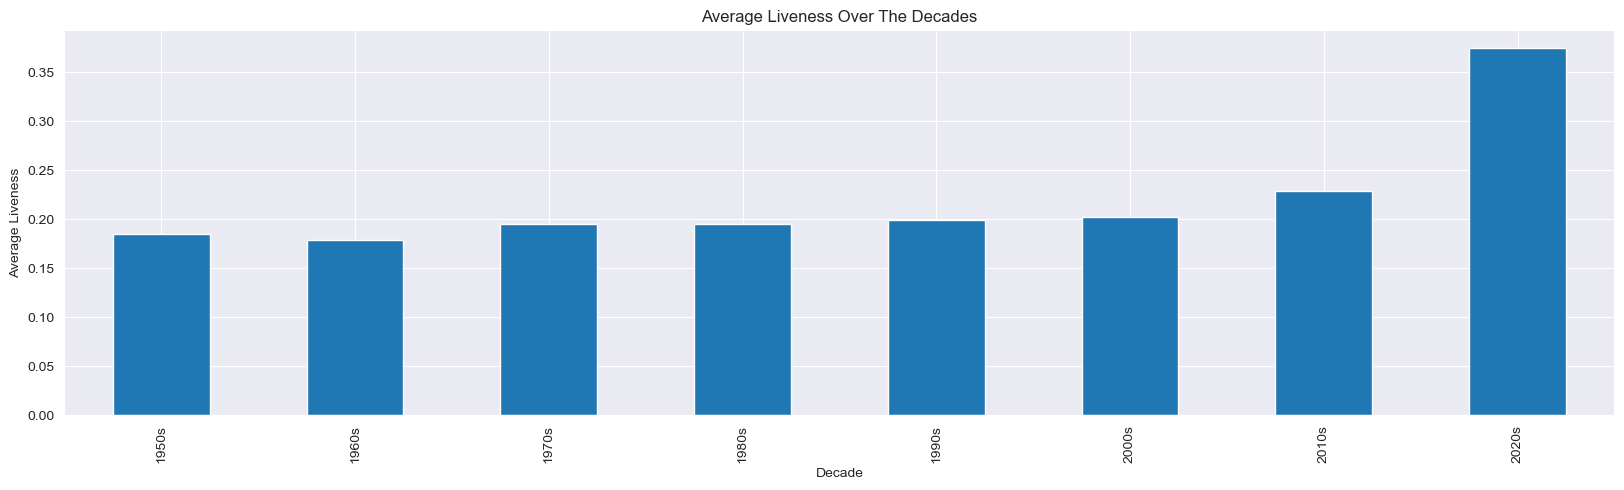

In [15]:
#Bar graphs to show how Rock dramatically became a 'live performance' genre overtime.

rock_liveness = rock_music_df.groupby('decade')['liveness'].mean()
rock_liveness.plot(kind='bar', title='Average Liveness Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Average Liveness')
plt.show()

Valence

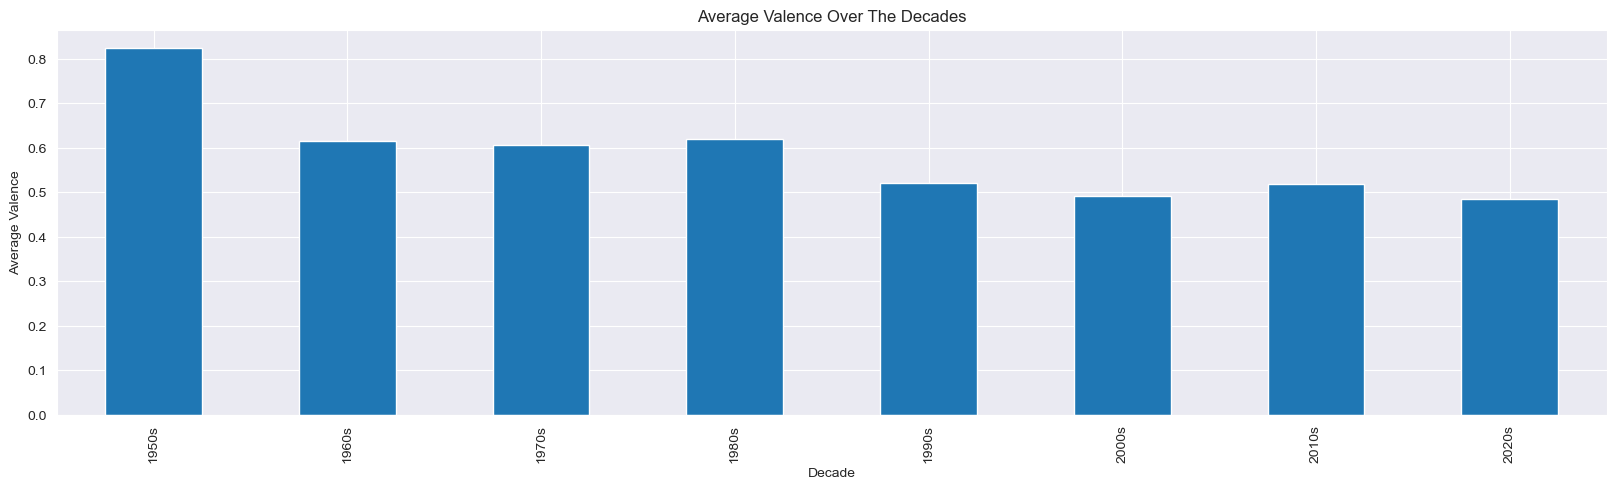

In [16]:
#Bar graph to show the 'valence' (positive) aspect of Rock music, starting very positive and then maturing and becoming less-so over the decades to encompass a wider range of emotion and subjects.

rock_valence = rock_music_df.groupby('decade')['valence'].mean()
rock_valence.plot(kind='bar', title='Average Valence Over The Decades', legend=False)
plt.xlabel("Decade")
plt.ylabel('Average Valence')
plt.show()

# Insights

1.) Rock music had a huge popularity boom in the 70s, 90s-2000s, then tapered off around the 2010s onward.
2.) Rock music was more focused on "dancing" in the beginning.
3.) "Loudness" was very important from the 70s-2000s, then tapered off around the 2010s with streaming.
4.) Many of the most popular songs were released in either the 80s or 2000s.
5.) The average rock song is about 4.4 minutes long.
6.) Rock music became far more energetic overtime.
7.) "Liveness" became a much more important factor in Rock music production from the 2000s onward.
8.) Rock music was very positive in the 50s, and dramatically tapered off over the decades to more middled levels.